# Using CAMI ground truth

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import dash_bio
import sys
import seaborn as sns
from pandas.plotting import scatter_matrix
from tsne import bh_sne
from sklearn.decomposition import PCA
from skbio.stats.composition import ilr, clr, multiplicative_replacement

In [2]:
df_blast=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.blastp.tsv", sep="\t", header=None, usecols=[0, 1, 2, 10, 11])
df_blast=df_blast.rename(columns={0:"qseqid", 1: "sseqid", 2:"pident", 10:"e-value", 11:"bitscore"})
df_blast

qseqid           sseqid  pident       e-value  bitscore
0            S|S1|C15_1  GCA_902381685.1   100.0  1.460000e-41     153.0
1            S|S1|C15_1  GCA_900549995.1    78.9  1.200000e-32     128.0
2            S|S1|C15_1  GCA_900550235.1    78.9  1.070000e-31     125.0
3            S|S1|C15_1  GCA_905197485.1    80.3  2.730000e-31     124.0
4            S|S1|C15_1  GCF_016900655.1    76.0  3.750000e-31     124.0
...                 ...              ...     ...           ...       ...
11747314  S|S1|C55794_6  GCF_900107195.1    46.2  2.570000e-61     203.0
11747315  S|S1|C55794_6  GCF_007004735.1    44.1  2.990000e-61     203.0
11747316  S|S1|C55794_6  GCF_000337835.1    43.7  3.280000e-61     203.0
11747317  S|S1|C55794_6  GCF_009674605.1    45.6  3.900000e-61     202.0
11747318  S|S1|C55794_6  GCF_001469955.1    41.2  5.170000e-61     202.0

[11747319 rows x 5 columns]

In [3]:
mapTaxid_df=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/gtdb-taxdump/R207/taxid.map", sep="\t",header=None)
mapTaxid_df=mapTaxid_df.rename(columns={0:"sseqid", 1: "taxid"})
mapTaxid_df


sseqid       taxid
0       GCF_000979375.1  1349515035
1       GCF_000970165.1  1457399847
2       GCF_000979555.1   732503645
3       GCF_000980105.1  2988443261
4       GCF_000007065.1   369781300
...                 ...         ...
317537  GCA_003222815.1  1987068165
317538  GCA_910586715.1  3806983282
317539  GCA_910583785.1  2506431460
317540  GCA_017556805.1  3295183182
317541  GCF_900116235.1  2173067957

[317542 rows x 2 columns]

In [4]:
blast_taxid_df=df_blast.merge(mapTaxid_df, on="sseqid", how="inner")
blast_taxid_df

qseqid           sseqid  pident        e-value  bitscore  \
0              S|S1|C15_1  GCA_902381685.1   100.0   1.460000e-41     153.0   
1              S|S1|C15_2  GCA_902381685.1   100.0   8.490000e-36     125.0   
2              S|S1|C15_3  GCA_902381685.1   100.0  1.410000e-126     363.0   
3              S|S1|C15_4  GCA_902381685.1   100.0   0.000000e+00     898.0   
4              S|S1|C15_5  GCA_902381685.1   100.0   0.000000e+00     919.0   
...                   ...              ...     ...            ...       ...   
11747314  S|S1|C51755_318  GCA_002254415.1    38.0   9.270000e-53     183.0   
11747315  S|S1|C51755_265  GCA_000010645.1    45.6   1.100000e-75     240.0   
11747316  S|S1|C51755_318  GCA_002789465.1    38.4   1.210000e-56     193.0   
11747317  S|S1|C51755_352  GCA_002687275.1    27.2   2.290000e-29     124.0   
11747318  S|S1|C51755_362  GCA_018457335.1    35.6   8.560000e-06      57.4   

               taxid  
0         1736166701  
1         1736166701  
2         1736166701  
3         1736166701  
4         1736166701  
...              ...  
11747314   768257595  
11747315    38421175  
11747316  3979176545  
11747317  4108335183  
11747318  2727452701  

[11747319 rows x 6 columns]

In [5]:
orf_lca_df=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.orfs.lca.tsv", sep="\t")
orf_lca_df

qseqid       name     rank         lca
0         S|S1|C15_1  902381685  no rank  1736166701
1         S|S1|C15_2  902381685  no rank  1736166701
2         S|S1|C15_3  902381685  no rank  1736166701
3         S|S1|C15_4  902381685  no rank  1736166701
4         S|S1|C15_5  902381685  no rank  1736166701
...              ...        ...      ...         ...
68388  S|S1|C55794_2  000496235  no rank   272826040
68389  S|S1|C55794_3  000496235  no rank   272826040
68390  S|S1|C55794_4  000496235  no rank   272826040
68391  S|S1|C55794_5  000496235  no rank   272826040
68392  S|S1|C55794_6  000496235  no rank   272826040

[68393 rows x 4 columns]

In [6]:
blast_lca_df=blast_taxid_df.merge(orf_lca_df, on="qseqid", how="outer")
blast_lca_df

qseqid           sseqid  pident       e-value  bitscore  \
0            S|S1|C15_1  GCA_902381685.1   100.0  1.460000e-41     153.0   
1            S|S1|C15_1  GCA_900549995.1    78.9  1.200000e-32     128.0   
2            S|S1|C15_1  GCA_900550235.1    78.9  1.070000e-31     125.0   
3            S|S1|C15_1  GCA_905197485.1    80.3  2.730000e-31     124.0   
4            S|S1|C15_1  GCF_016900655.1    76.0  3.750000e-31     124.0   
...                 ...              ...     ...           ...       ...   
11747314  S|S1|C53670_2  GCA_000496235.1   100.0  1.380000e-48     156.0   
11747315  S|S1|C53670_3  GCA_000496235.1   100.0  3.100000e-65     200.0   
11747316  S|S1|C53670_4  GCA_000496235.1   100.0  1.340000e-30     116.0   
11747317  S|S1|C54222_8  GCA_000496235.1   100.0  3.810000e-42     140.0   
11747318  S|S1|C55310_1  GCA_000496235.1    98.5  1.110000e-33     119.0   

               taxid       name     rank         lca  
0         1736166701  902381685  no rank  1736166701  
1           68063635  902381685  no rank  1736166701  
2         4205286776  902381685  no rank  1736166701  
3          357385291  902381685  no rank  1736166701  
4         3690373915  902381685  no rank  1736166701  
...              ...        ...      ...         ...  
11747314   272826040  000496235  no rank   272826040  
11747315   272826040  000496235  no rank   272826040  
11747316   272826040  000496235  no rank   272826040  
11747317   272826040  000496235  no rank   272826040  
11747318   272826040  000496235  no rank   272826040  

[11747319 rows x 9 columns]

In [7]:
blast_lca_df.sort_values(by=["qseqid", "bitscore"], ascending=[True, False], inplace=True)
blast_lca_df3=blast_lca_df.drop_duplicates(subset=['taxid', 'qseqid'])
blast_lca_df3["contig"]=blast_lca_df3["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
# blast_lca_df3.set_index("contig", inplace=True)
blast_lca_df3

qseqid           sseqid  pident        e-value  bitscore  \
4242071  S|S1|C10001_1  GCF_000011705.1   100.0   3.180000e-34     127.0   
4242067  S|S1|C10001_1  GCF_000012365.1    98.3   1.250000e-33     125.0   
4242069  S|S1|C10001_1  GCF_000959365.1    70.0   4.510000e-17      82.0   
4187629  S|S1|C10001_2  GCF_000011705.1   100.0  6.660000e-267     731.0   
4187627  S|S1|C10001_2  GCF_000959365.1    83.8  5.780000e-227     630.0   
...                ...              ...     ...            ...       ...   
152769    S|S1|C9986_9  GCA_017399445.1    46.5  1.650000e-104     324.0   
152848    S|S1|C9986_9  GCA_910589265.1    47.0  2.200000e-104     324.0   
152813    S|S1|C9986_9  GCF_003478085.1    45.9  4.540000e-104     323.0   
152814    S|S1|C9986_9  GCA_900548905.1    45.9  4.540000e-104     323.0   
152851    S|S1|C9986_9  GCA_017408735.1    46.5  4.540000e-104     323.0   

              taxid          name     rank         lca       contig  
4242071  1132927932  burkholderia    genus   835133672  S|S1|C10001  
4242067  1730790438  burkholderia    genus   835133672  S|S1|C10001  
4242069   672627656  burkholderia    genus   835133672  S|S1|C10001  
4187629  1132927932     000011705  no rank  1132927932  S|S1|C10001  
4187627   672627656     000011705  no rank  1132927932  S|S1|C10001  
...             ...           ...      ...         ...          ...  
152769   1323388952     902381685  no rank  1736166701   S|S1|C9986  
152848   3481688409     902381685  no rank  1736166701   S|S1|C9986  
152813   2979942861     902381685  no rank  1736166701   S|S1|C9986  
152814   3828553300     902381685  no rank  1736166701   S|S1|C9986  
152851     70775409     902381685  no rank  1736166701   S|S1|C9986  

[11307605 rows x 10 columns]

In [8]:
gt=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/S_S001__genomes_30__insert_180_gsa_mapping.tsv.gz", sep="\t", usecols=["#anonymous_gsa_id", "genome_id", "number_reads"])
gt_subset=gt.loc[gt["genome_id"].isin(["1007115.1", "1009708.1", "1045854.1", "1050222.1"])]
gt_subset.set_index("#anonymous_gsa_id", inplace=True)
gt_subset

genome_id  number_reads
#anonymous_gsa_id                         
S|S1|C30688        1045854.1             4
S|S1|C3013         1045854.1            52
S|S1|C45370        1045854.1             1
S|S1|C27128        1045854.1             1
S|S1|C44337        1045854.1           162
...                      ...           ...
S|S1|C47200        1007115.1           398
S|S1|C52907        1007115.1           398
S|S1|C1627         1007115.1           398
S|S1|C9222         1007115.1           398
S|S1|C41998        1007115.1           398

[3531 rows x 2 columns]

In [9]:
df_bin_blast_subset=blast_lca_df3.merge(gt_subset, how="inner", right_index=True, left_on='contig')
df_bin_blast_subset

qseqid           sseqid  pident        e-value  bitscore  \
11451811  S|S1|C10123_1  GCA_000384615.1   100.0  3.740000e-167     470.0   
11451815  S|S1|C10123_1  GCA_902607625.1    38.5   8.910000e-38     147.0   
11451812  S|S1|C10123_1  GCA_000163555.2    34.6   3.930000e-32     132.0   
11451810  S|S1|C10123_1  GCF_002117405.1    32.8   1.640000e-28     122.0   
11451814  S|S1|C10123_1  GCA_905612265.1    34.6   5.540000e-21     101.0   
...                 ...              ...     ...            ...       ...   
8889370    S|S1|C9938_9  GCF_012849095.1    84.9   0.000000e+00    1799.0   
8889371    S|S1|C9938_9  GCF_009909185.1    85.4   0.000000e+00    1799.0   
8889433    S|S1|C9938_9  GCF_013359945.1    85.7   0.000000e+00    1799.0   
8889502    S|S1|C9938_9  GCF_002240225.1    86.1   0.000000e+00    1799.0   
8889529    S|S1|C9938_9  GCF_016019935.1    85.0   0.000000e+00    1799.0   

               taxid           name     rank         lca       contig  \
11451811  1786443688      000384615  no rank  1786443688  S|S1|C10123   
11451815  3357096733      000384615  no rank  1786443688  S|S1|C10123   
11451812  4164278190      000384615  no rank  1786443688  S|S1|C10123   
11451810  2011781032      000384615  no rank  1786443688  S|S1|C10123   
11451814   603987008      000384615  no rank  1786443688  S|S1|C10123   
...              ...            ...      ...         ...          ...   
8889370   3507182564  paenibacillus    genus    74607795   S|S1|C9938   
8889371   3204946282  paenibacillus    genus    74607795   S|S1|C9938   
8889433     74019335  paenibacillus    genus    74607795   S|S1|C9938   
8889502   2828858494  paenibacillus    genus    74607795   S|S1|C9938   
8889529   4120902064  paenibacillus    genus    74607795   S|S1|C9938   

          genome_id  number_reads  
11451811  1009708.1           124  
11451815  1009708.1           124  
11451812  1009708.1           124  
11451810  1009708.1           124  
11451814  1009708.1           124  
...             ...           ...  
8889370   1050222.1         29227  
8889371   1050222.1         29227  
8889433   1050222.1         29227  
8889502   1050222.1         29227  
8889529   1050222.1         29227  

[1325829 rows x 12 columns]

## Function for CLR transformation¶

In [10]:
def run_clr(df, taxa, metric):
#     df.reset_index(inplace=True)
    df_taxa=dict(list(df.groupby("rank")))[taxa]
    df=df_taxa.pivot(index="qseqid", columns="taxid", values=metric).fillna(0)
    X=df.fillna(0).to_numpy()
    X = multiplicative_replacement(X)
    X_norm=clr(X)
    norm_df = pd.DataFrame(X_norm, index=df.index)
    X=norm_df.dropna(axis="index", how="all").fillna(0).to_numpy()
    random_state = np.random.RandomState(42)
    X = PCA(n_components=50, random_state=random_state).fit_transform(X)
    n_samples, n_components = X.shape
    perplexity = 30.0
    n_rows = n_samples - 1
    scaler = 3.0
    if n_rows < (scaler * perplexity):
        perplexity = (n_rows / scaler) - 1
    embed=bh_sne(data=X,
            d=2,
            perplexity=perplexity,
            random_state=random_state,
        )
    embedded_df = pd.DataFrame(embed, index=df.index, columns=["x_1", "x_2"])
    embedded_df.reset_index(inplace=True)
    embedded_df["contig"]=embedded_df["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
#     gt_subset.set_index("#anonymous_gsa_id", inplace=True)
    df_bin_embed=embedded_df.merge(gt_subset, how="inner", right_index=True, left_on='contig')
    return df_bin_embed

In [11]:
def plot_scatter(df):
    # Get Unique continents
    color_labels = df["genome_id"].unique()
    num=len(df["genome_id"].unique())
    # List of colors in the color palettes
    rgb_values = sns.color_palette("Set2", num)
    # Map continents to the colors
    color_map = dict(zip(color_labels, rgb_values))
    # Finally use the mapped values
    plt.figure(figsize=(10, 10), dpi=80)
    plt.scatter(df['x_1'], df['x_2'], c=df['genome_id'].map(color_map),alpha=0.3)



### CLR function to loop through each rank

In [12]:
def run_clr(df, taxa, metric):
#     df.reset_index(inplace=True)
    df_taxa=dict(list(df.groupby("rank")))[taxa]
    df=df_taxa.pivot(index="qseqid", columns="taxid", values=metric).fillna(0)
    X=df.fillna(0).to_numpy()
    X = multiplicative_replacement(X)
    X_norm=clr(X)
    norm_df = pd.DataFrame(X_norm, index=df.index)
    X=norm_df.dropna(axis="index", how="all").fillna(0).to_numpy()
    random_state = np.random.RandomState(42)
    X = PCA(n_components=50, random_state=random_state).fit_transform(X)
    n_samples, n_components = X.shape
    perplexity = 30.0
    n_rows = n_samples - 1
    scaler = 3.0
    if n_rows < (scaler * perplexity):
        perplexity = (n_rows / scaler) - 1
    embed=bh_sne(data=X,
            d=2,
            perplexity=perplexity,
            random_state=random_state,
        )
    embedded_df = pd.DataFrame(embed, index=df.index, columns=["x_1", "x_2"])
    embedded_df.reset_index(inplace=True)
    embedded_df["contig"]=embedded_df["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
#     gt_subset.set_index("#anonymous_gsa_id", inplace=True)
    df_bin_embed=embedded_df.merge(gt_subset, how="inner", right_index=True, left_on='contig')
    return df_bin_embed

## Subsetting database on taxonomy

### No rank (strain level)

In [13]:
embed_noRank=run_clr(df_bin_blast_subset, "no rank", "pident")
embed_noRank

qseqid        x_1        x_2       contig  genome_id  \
0      S|S1|C10123_1  -0.981526  -3.184226  S|S1|C10123  1009708.1   
1      S|S1|C10123_2  -0.963443  -3.167738  S|S1|C10123  1009708.1   
2     S|S1|C10141_11  14.197481 -12.167022  S|S1|C10141  1007115.1   
3     S|S1|C10141_13   3.893621 -19.742955  S|S1|C10141  1007115.1   
4     S|S1|C10141_14  16.526524 -26.813200  S|S1|C10141  1007115.1   
...              ...        ...        ...          ...        ...   
1184    S|S1|C9843_8 -16.973521   4.904622   S|S1|C9843  1050222.1   
1185    S|S1|C9843_9 -17.444749   4.152235   S|S1|C9843  1050222.1   
1186    S|S1|C9881_1  14.186899  25.266659   S|S1|C9881  1045854.1   
1187    S|S1|C9881_2  -9.653404  12.628453   S|S1|C9881  1045854.1   
1188    S|S1|C9881_3  15.174821  21.594247   S|S1|C9881  1045854.1   

      number_reads  
0              124  
1              124  
2            56487  
3            56487  
4            56487  
...            ...  
1184         30069  
1185         30069  
1186           134  
1187           134  
1188           134  

[1189 rows x 6 columns]

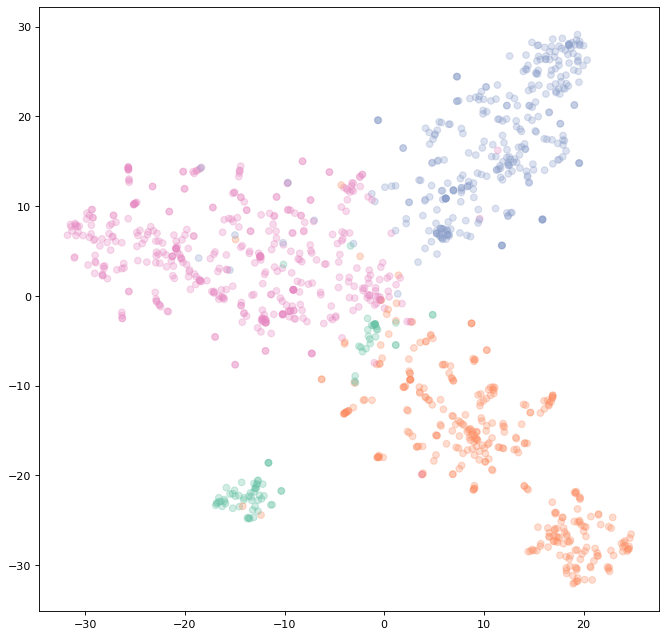

In [14]:
plot_scatter(embed_noRank)

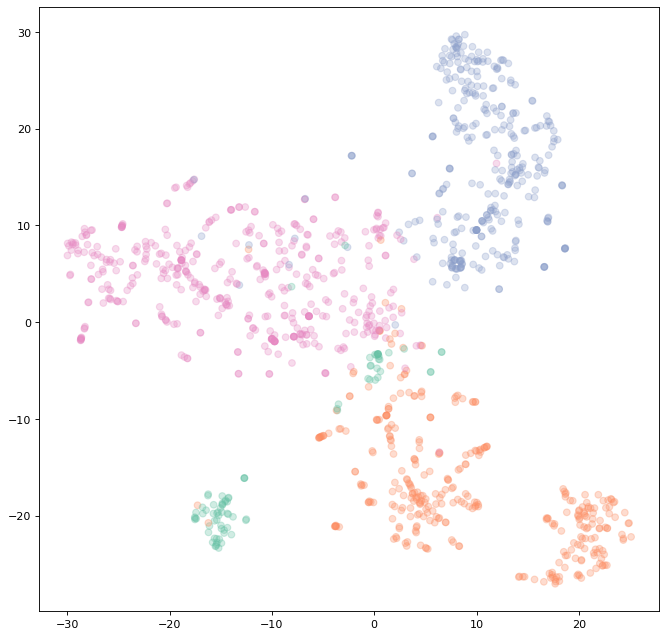

In [15]:
embed_noRank=run_clr(df_bin_blast_subset, "no rank", "bitscore")
plot_scatter(embed_noRank)

### Genus

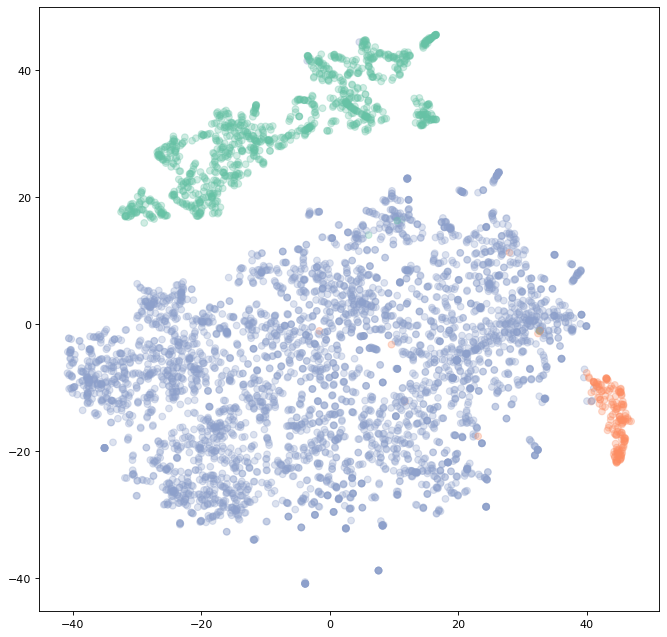

In [16]:
embed_genus=run_clr(df_bin_blast_subset, "genus", "pident")
plot_scatter(embed_genus)

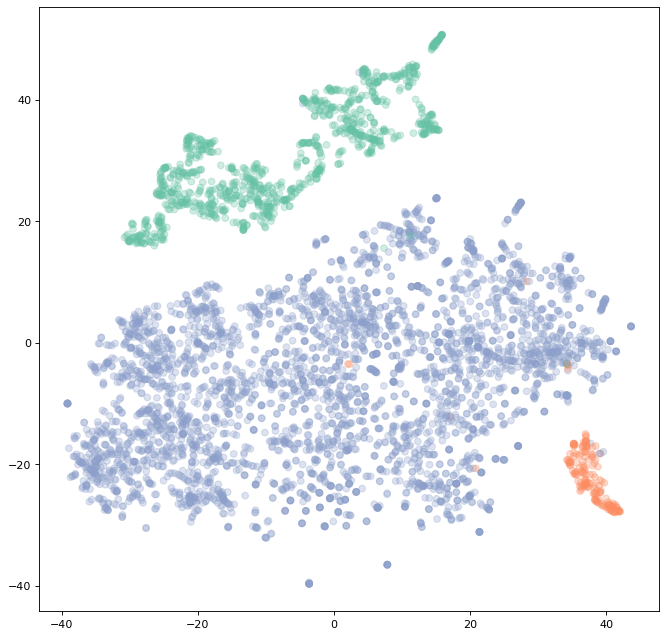

In [17]:
embed_genus=run_clr(df_bin_blast_subset, "genus", "bitscore")
plot_scatter(embed_genus)

In [18]:
embed_genus

qseqid        x_1        x_2       contig  genome_id  \
0      S|S1|C10141_1 -27.806731  19.488048  S|S1|C10141  1007115.1   
1     S|S1|C10141_10  -0.691012  37.595030  S|S1|C10141  1007115.1   
2     S|S1|C10141_12  13.917536  35.608427  S|S1|C10141  1007115.1   
3     S|S1|C10141_19 -28.301855  16.509027  S|S1|C10141  1007115.1   
4      S|S1|C10141_2   5.108912  42.865240  S|S1|C10141  1007115.1   
...              ...        ...        ...          ...        ...   
5291    S|S1|C9938_4  28.691478  -1.852299   S|S1|C9938  1050222.1   
5292    S|S1|C9938_6 -24.198339  -3.828560   S|S1|C9938  1050222.1   
5293    S|S1|C9938_7 -16.405397 -25.159483   S|S1|C9938  1050222.1   
5294    S|S1|C9938_8 -23.843831 -21.464807   S|S1|C9938  1050222.1   
5295    S|S1|C9938_9  -9.038645 -17.089516   S|S1|C9938  1050222.1   

      number_reads  
0            56487  
1            56487  
2            56487  
3            56487  
4            56487  
...            ...  
5291         29227  
5292         29227  
5293         29227  
5294         29227  
5295         29227  

[5296 rows x 6 columns]

### Family

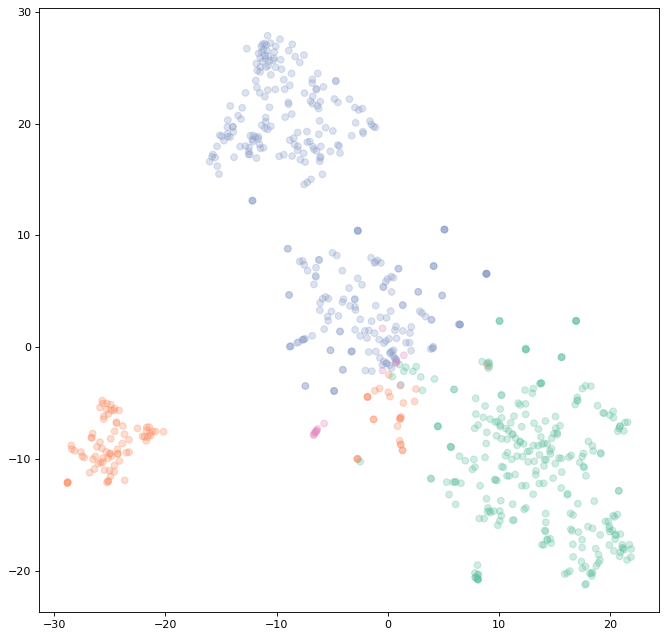

In [19]:
embed_family=run_clr(df_bin_blast_subset, "family", "pident")
plot_scatter(embed_family)

In [20]:
embed_family

qseqid        x_1        x_2       contig  genome_id  \
0     S|S1|C10123_3   8.911974  -1.456244  S|S1|C10123  1009708.1   
1    S|S1|C10141_46 -21.682071  -7.177546  S|S1|C10141  1007115.1   
2    S|S1|C10250_11   0.195351  -4.437636  S|S1|C10250  1007115.1   
3    S|S1|C10250_27 -21.404477  -7.722142  S|S1|C10250  1007115.1   
4    S|S1|C10250_41 -25.562892  -6.447178  S|S1|C10250  1007115.1   
..              ...        ...        ...          ...        ...   
720   S|S1|C9412_19   1.180618  -3.378861   S|S1|C9412  1050222.1   
721   S|S1|C9412_37  -3.484835   5.283998   S|S1|C9412  1050222.1   
722    S|S1|C9623_1  17.099331 -14.012740   S|S1|C9623  1009708.1   
723    S|S1|C9623_2  18.422819 -20.150519   S|S1|C9623  1009708.1   
724    S|S1|C9680_7  -1.195434   7.522967   S|S1|C9680  1050222.1   

     number_reads  
0             124  
1           56487  
2           39452  
3           39452  
4           39452  
..            ...  
720        109966  
721        109966  
722           143  
723           143  
724         11742  

[725 rows x 6 columns]

### Order

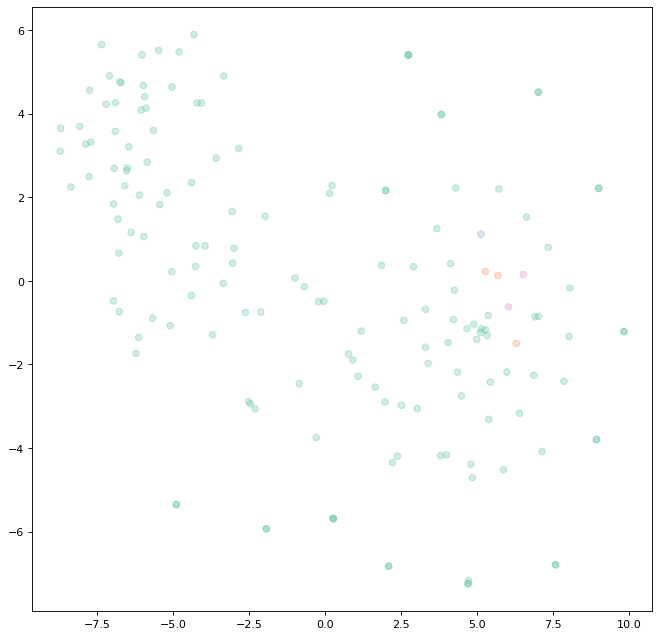

In [21]:
embed_order=run_clr(df_bin_blast_subset, "order", "bitscore")
plot_scatter(embed_order)

## Using the full set of bins

In [22]:
# gt=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/S_S001__genomes_30__insert_180_gsa_mapping.tsv.gz", sep="\t", usecols=["#anonymous_gsa_id", "genome_id", "number_reads"])
# gt.set_index("#anonymous_gsa_id", inplace=True)
# df_bin_blast_subset=blast_lca_df3.merge(gt, how="inner", right_index=True, left_on='contig')
# df_bin_blast_subset


In [23]:
# embed_genus=run_clr(df_bin_blast_subset, "genus", "pident")

In [24]:
embed_genus=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/fullDataset_genus_embed.tsv", sep="\t")
embed_genus

Unnamed: 0         qseqid        x_1        x_2       contig  \
0               0  S|S1|C10001_1  -4.213908 -13.258300  S|S1|C10001   
1               1  S|S1|C10001_4 -13.198717 -19.929014  S|S1|C10001   
2               2  S|S1|C10012_9 -11.945796 -10.138356  S|S1|C10012   
3               3  S|S1|C10020_1  -3.544325 -17.345505  S|S1|C10020   
4               4  S|S1|C10020_3  -7.269364 -21.872570  S|S1|C10020   
...           ...            ...        ...        ...          ...   
22906       22906   S|S1|C9981_1 -15.773814 -27.850851   S|S1|C9981   
22907       22907   S|S1|C9981_5  -3.792109 -16.362594   S|S1|C9981   
22908       22908   S|S1|C9981_8 -16.921857 -17.982158   S|S1|C9981   
22909       22909   S|S1|C9986_5  33.257159  12.025785   S|S1|C9986   
22910       22910   S|S1|C9986_7  35.025447  11.255836   S|S1|C9986   

       genome_id  number_reads  
0       370895.1           176  
1       370895.1           176  
2      1229484.1          3132  
3       370895.1           360  
4       370895.1           360  
...          ...           ...  
22906   370895.1           374  
22907   370895.1           374  
22908   370895.1           374  
22909   742723.1           592  
22910   742723.1           592  

[22911 rows x 7 columns]

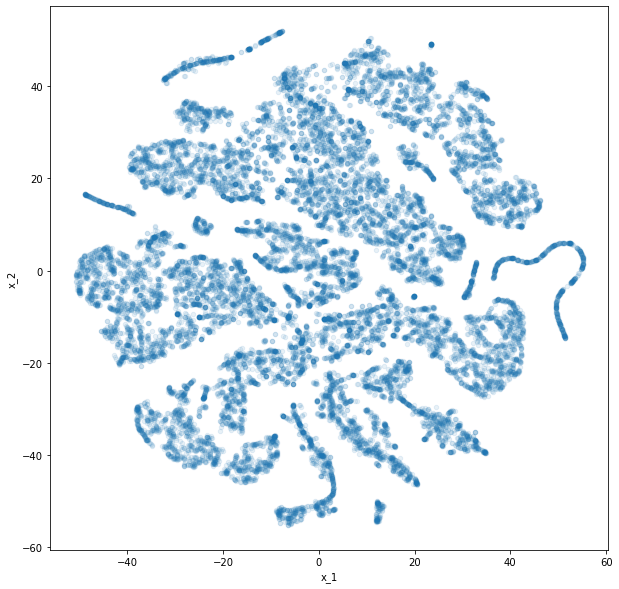

In [25]:
embed_genus.plot.scatter(x="x_1", y="x_2", alpha=0.1,figsize = (10, 10))

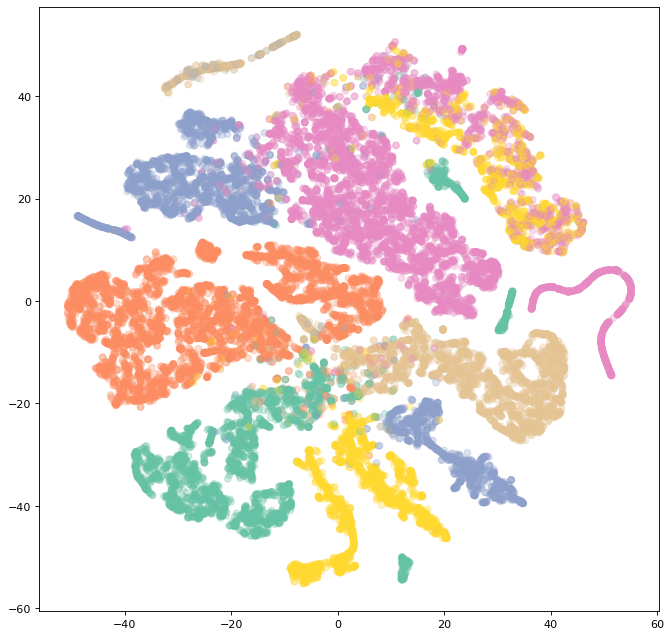

In [26]:
plot_scatter(embed_genus)

In [27]:
embed_genus['genome_id']=embed_genus['genome_id'].apply(str)

In [28]:
import plotly.express as px
fig = px.scatter(embed_genus, x="x_1", y="x_2", color="genome_id")
fig.show()


## Combining LCA data to the above plots

## Full bin set

In [29]:
embed_genus

Unnamed: 0         qseqid        x_1        x_2       contig  \
0               0  S|S1|C10001_1  -4.213908 -13.258300  S|S1|C10001   
1               1  S|S1|C10001_4 -13.198717 -19.929014  S|S1|C10001   
2               2  S|S1|C10012_9 -11.945796 -10.138356  S|S1|C10012   
3               3  S|S1|C10020_1  -3.544325 -17.345505  S|S1|C10020   
4               4  S|S1|C10020_3  -7.269364 -21.872570  S|S1|C10020   
...           ...            ...        ...        ...          ...   
22906       22906   S|S1|C9981_1 -15.773814 -27.850851   S|S1|C9981   
22907       22907   S|S1|C9981_5  -3.792109 -16.362594   S|S1|C9981   
22908       22908   S|S1|C9981_8 -16.921857 -17.982158   S|S1|C9981   
22909       22909   S|S1|C9986_5  33.257159  12.025785   S|S1|C9986   
22910       22910   S|S1|C9986_7  35.025447  11.255836   S|S1|C9986   

       genome_id  number_reads  
0       370895.1           176  
1       370895.1           176  
2      1229484.1          3132  
3       370895.1           360  
4       370895.1           360  
...          ...           ...  
22906   370895.1           374  
22907   370895.1           374  
22908   370895.1           374  
22909   742723.1           592  
22910   742723.1           592  

[22911 rows x 7 columns]

In [30]:
orf_lca_df

qseqid       name     rank         lca
0         S|S1|C15_1  902381685  no rank  1736166701
1         S|S1|C15_2  902381685  no rank  1736166701
2         S|S1|C15_3  902381685  no rank  1736166701
3         S|S1|C15_4  902381685  no rank  1736166701
4         S|S1|C15_5  902381685  no rank  1736166701
...              ...        ...      ...         ...
68388  S|S1|C55794_2  000496235  no rank   272826040
68389  S|S1|C55794_3  000496235  no rank   272826040
68390  S|S1|C55794_4  000496235  no rank   272826040
68391  S|S1|C55794_5  000496235  no rank   272826040
68392  S|S1|C55794_6  000496235  no rank   272826040

[68393 rows x 4 columns]

In [31]:
embed_genus_lca=embed_genus.merge(orf_lca_df, how="inner")
embed_genus_lca

Unnamed: 0         qseqid        x_1        x_2       contig  \
0               0  S|S1|C10001_1  -4.213908 -13.258300  S|S1|C10001   
1               1  S|S1|C10001_4 -13.198717 -19.929014  S|S1|C10001   
2               2  S|S1|C10012_9 -11.945796 -10.138356  S|S1|C10012   
3               3  S|S1|C10020_1  -3.544325 -17.345505  S|S1|C10020   
4               4  S|S1|C10020_3  -7.269364 -21.872570  S|S1|C10020   
...           ...            ...        ...        ...          ...   
22906       22906   S|S1|C9981_1 -15.773814 -27.850851   S|S1|C9981   
22907       22907   S|S1|C9981_5  -3.792109 -16.362594   S|S1|C9981   
22908       22908   S|S1|C9981_8 -16.921857 -17.982158   S|S1|C9981   
22909       22909   S|S1|C9986_5  33.257159  12.025785   S|S1|C9986   
22910       22910   S|S1|C9986_7  35.025447  11.255836   S|S1|C9986   

       genome_id  number_reads          name   rank         lca  
0       370895.1           176  burkholderia  genus   835133672  
1       370895.1           176  burkholderia  genus   835133672  
2      1229484.1          3132   sphingobium  genus  4212071235  
3       370895.1           360  burkholderia  genus   835133672  
4       370895.1           360  burkholderia  genus   835133672  
...          ...           ...           ...    ...         ...  
22906   370895.1           374  burkholderia  genus   835133672  
22907   370895.1           374  burkholderia  genus   835133672  
22908   370895.1           374  burkholderia  genus   835133672  
22909   742723.1           592  faecalimonas  genus  2398127031  
22910   742723.1           592  faecalimonas  genus  2398127031  

[22911 rows x 10 columns]

In [32]:
len(embed_genus_lca["lca"].unique())

47

## Adding bryazoan dataset

In [33]:
bry_blast=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/bryazoan_genome_AB1.tab", sep="\t", header=None, usecols=[0, 1, 2, 10, 11])
bry_blast=bry_blast.rename(columns={0:"qseqid", 1: "sseqid", 2:"pident", 10:"e-value", 11:"bitscore"})
bry_blast["genome_id"] = "Bry_AB1"
bry_blast=bry_blast.merge(mapTaxid_df, on="sseqid", how="inner")
bry_blast


qseqid           sseqid  pident       e-value  bitscore  \
0        CP017117.1_8  GCF_900215655.1    28.3  1.510000e-93     326.0   
1       CP017117.1_54  GCF_900215655.1    31.1  5.440000e-10      65.1   
2        CP017117.1_8  GCA_902510025.1    30.1  9.470000e-92     321.0   
3      CP017117.1_148  GCA_902510025.1    54.5  1.300000e-22      93.2   
4      CP017117.1_262  GCA_902510025.1    38.2  3.830000e-23     104.0   
...               ...              ...     ...           ...       ...   
20235  CP017117.1_592  GCF_003815655.1    32.6  7.960000e-30     126.0   
20236  CP017117.1_592  GCF_014062345.1    31.2  8.590000e-30     126.0   
20237  CP017117.1_593  GCA_004297825.1    26.4  4.700000e-07      60.8   
20238  CP017117.1_593  GCA_002328585.1    25.0  2.080000e-06      58.9   
20239  CP017117.1_593  GCA_017998375.1    26.4  2.240000e-06      57.4   

      genome_id       taxid  
0       Bry_AB1  3512282207  
1       Bry_AB1  3512282207  
2       Bry_AB1   899002240  
3       Bry_AB1   899002240  
4       Bry_AB1   899002240  
...         ...         ...  
20235   Bry_AB1   946964952  
20236   Bry_AB1  3238987916  
20237   Bry_AB1  3497359861  
20238   Bry_AB1  3322310815  
20239   Bry_AB1  1858695715  

[20240 rows x 7 columns]

In [34]:
bry_lca=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/bryazoan_genome_AB1.gtdb.lca.tsv", sep="\t")
bry_lca


qseqid                 name          rank         lca
0      CP017117.1_8             bacteria  superkingdom   609216830
1     CP017117.1_12             bacteria  superkingdom   609216830
2     CP017117.1_14             bacteria  superkingdom   609216830
3     CP017117.1_21            015665455       no rank  2173624257
4     CP017117.1_26  alphaproteobacteria         class  3294429563
..              ...                  ...           ...         ...
119  CP017117.1_353            002923395       no rank  1251339372
120  CP017117.1_357             bacteria  superkingdom   609216830
121  CP017117.1_361             bacteria  superkingdom   609216830
122  CP017117.1_592             bacteria  superkingdom   609216830
123  CP017117.1_593              uba4802         class    46800724

[124 rows x 4 columns]

In [35]:
bry_blast_lca_df=bry_blast.merge(bry_lca, on="qseqid", how="outer")
bry_blast_lca_df

qseqid           sseqid  pident       e-value  bitscore  \
0        CP017117.1_8  GCF_900215655.1    28.3  1.510000e-93     326.0   
1        CP017117.1_8  GCA_902510025.1    30.1  9.470000e-92     321.0   
2        CP017117.1_8  GCA_902569095.1    27.9  1.140000e-90     318.0   
3        CP017117.1_8  GCF_001517915.1    30.1  1.220000e-90     318.0   
4        CP017117.1_8  GCA_905182345.1    32.3  1.310000e-90     318.0   
...               ...              ...     ...           ...       ...   
20235  CP017117.1_230  GCA_902772105.1    36.4  1.450000e-06      59.7   
20236  CP017117.1_230  GCA_900757335.1    34.8  4.740000e-06      58.2   
20237  CP017117.1_593  GCA_004297825.1    26.4  4.700000e-07      60.8   
20238  CP017117.1_593  GCA_002328585.1    25.0  2.080000e-06      58.9   
20239  CP017117.1_593  GCA_017998375.1    26.4  2.240000e-06      57.4   

      genome_id       taxid             name          rank         lca  
0       Bry_AB1  3512282207         bacteria  superkingdom   609216830  
1       Bry_AB1   899002240         bacteria  superkingdom   609216830  
2       Bry_AB1   535825565         bacteria  superkingdom   609216830  
3       Bry_AB1  2439799945         bacteria  superkingdom   609216830  
4       Bry_AB1  4223940167         bacteria  superkingdom   609216830  
...         ...         ...              ...           ...         ...  
20235   Bry_AB1  1049107114  oscillospirales         order  2406156048  
20236   Bry_AB1  2561106798  oscillospirales         order  2406156048  
20237   Bry_AB1  3497359861          uba4802         class    46800724  
20238   Bry_AB1  3322310815          uba4802         class    46800724  
20239   Bry_AB1  1858695715          uba4802         class    46800724  

[20240 rows x 10 columns]

In [36]:
bry_blast_lca_df.sort_values(by=["qseqid", "bitscore"], ascending=[True, False], inplace=True)
bry_blast_lca_df3=bry_blast_lca_df.drop_duplicates(subset=['taxid', 'qseqid'])
bry_blast_lca_df3["contig"]=bry_blast_lca_df3["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
bry_blast_lca_df3

qseqid           sseqid  pident       e-value  bitscore  \
20018  CP017117.1_100  GCA_012735215.1    23.2  1.430000e-09      70.9   
20019  CP017117.1_100  GCA_900557165.1    23.8  7.660000e-09      68.6   
20020  CP017117.1_100  GCF_009911265.1    23.3  1.060000e-08      68.2   
20021  CP017117.1_100  GCA_012744355.1    24.9  1.770000e-08      67.4   
20022  CP017117.1_100  GCA_012839745.1    22.0  1.050000e-07      65.1   
...               ...              ...     ...           ...       ...   
15169   CP017117.1_99  GCA_902797945.1    34.8  2.470000e-33     136.0   
15179   CP017117.1_99  GCA_007131165.1    37.2  3.020000e-33     136.0   
15154   CP017117.1_99  GCA_015055785.1    34.9  1.670000e-33     135.0   
15180   CP017117.1_99  GCA_902593905.1    35.4  3.050000e-33     135.0   
15171   CP017117.1_99  GCA_002384725.1    36.8  2.540000e-33     134.0   

      genome_id       taxid      name          rank        lca      contig  
20018   Bry_AB1  4196349650  bacteria  superkingdom  609216830  CP017117.1  
20019   Bry_AB1   515008697  bacteria  superkingdom  609216830  CP017117.1  
20020   Bry_AB1  3920939067  bacteria  superkingdom  609216830  CP017117.1  
20021   Bry_AB1  2159789509  bacteria  superkingdom  609216830  CP017117.1  
20022   Bry_AB1  1746240979  bacteria  superkingdom  609216830  CP017117.1  
...         ...         ...       ...           ...        ...         ...  
15169   Bry_AB1  3788777061  bacteria  superkingdom  609216830  CP017117.1  
15179   Bry_AB1  2196075705  bacteria  superkingdom  609216830  CP017117.1  
15154   Bry_AB1  3091694417  bacteria  superkingdom  609216830  CP017117.1  
15180   Bry_AB1  3495463614  bacteria  superkingdom  609216830  CP017117.1  
15171   Bry_AB1  3831472584  bacteria  superkingdom  609216830  CP017117.1  

[20149 rows x 11 columns]

In [37]:
dict(list(bry_blast_lca_df3.groupby("rank")))

{'class':                qseqid           sseqid  pident        e-value  bitscore  \
 9202   CP017117.1_115  GCF_017656055.1    45.3   6.000000e-36     138.0   
 9178   CP017117.1_115  GCA_015134335.1    43.5   2.120000e-34     134.0   
 9221   CP017117.1_115  GCA_015134435.1    47.2   1.060000e-33     132.0   
 9223   CP017117.1_115  GCA_015134375.1    44.1   5.910000e-33     130.0   
 9240   CP017117.1_115  GCA_002728355.1    40.1   3.280000e-32     128.0   
 ...               ...              ...     ...            ...       ...   
 3816    CP017117.1_29  GCA_902532645.1    35.4  1.320000e-109     357.0   
 3839    CP017117.1_29  GCA_902617825.1    33.2  3.630000e-109     357.0   
 20237  CP017117.1_593  GCA_004297825.1    26.4   4.700000e-07      60.8   
 20238  CP017117.1_593  GCA_002328585.1    25.0   2.080000e-06      58.9   
 20239  CP017117.1_593  GCA_017998375.1    26.4   2.240000e-06      57.4   
 
       genome_id       taxid                 name   rank         lca  \
 9202

In [38]:
gt=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/S_S001__genomes_30__insert_180_gsa_mapping.tsv.gz", sep="\t", usecols=["#anonymous_gsa_id", "genome_id", "number_reads"])
gt.set_index("#anonymous_gsa_id", inplace=True)
df_bin_blast_full=blast_lca_df3.merge(gt, how="inner", right_index=True, left_on='contig')
df_bin_blast_full


qseqid           sseqid  pident        e-value  bitscore  \
4242071  S|S1|C10001_1  GCF_000011705.1   100.0   3.180000e-34     127.0   
4242067  S|S1|C10001_1  GCF_000012365.1    98.3   1.250000e-33     125.0   
4242069  S|S1|C10001_1  GCF_000959365.1    70.0   4.510000e-17      82.0   
4187629  S|S1|C10001_2  GCF_000011705.1   100.0  6.660000e-267     731.0   
4187627  S|S1|C10001_2  GCF_000959365.1    83.8  5.780000e-227     630.0   
...                ...              ...     ...            ...       ...   
152769    S|S1|C9986_9  GCA_017399445.1    46.5  1.650000e-104     324.0   
152848    S|S1|C9986_9  GCA_910589265.1    47.0  2.200000e-104     324.0   
152813    S|S1|C9986_9  GCF_003478085.1    45.9  4.540000e-104     323.0   
152814    S|S1|C9986_9  GCA_900548905.1    45.9  4.540000e-104     323.0   
152851    S|S1|C9986_9  GCA_017408735.1    46.5  4.540000e-104     323.0   

              taxid          name     rank         lca       contig  \
4242071  1132927932  burkholderia    genus   835133672  S|S1|C10001   
4242067  1730790438  burkholderia    genus   835133672  S|S1|C10001   
4242069   672627656  burkholderia    genus   835133672  S|S1|C10001   
4187629  1132927932     000011705  no rank  1132927932  S|S1|C10001   
4187627   672627656     000011705  no rank  1132927932  S|S1|C10001   
...             ...           ...      ...         ...          ...   
152769   1323388952     902381685  no rank  1736166701   S|S1|C9986   
152848   3481688409     902381685  no rank  1736166701   S|S1|C9986   
152813   2979942861     902381685  no rank  1736166701   S|S1|C9986   
152814   3828553300     902381685  no rank  1736166701   S|S1|C9986   
152851     70775409     902381685  no rank  1736166701   S|S1|C9986   

         genome_id  number_reads  
4242071   370895.1           176  
4242067   370895.1           176  
4242069   370895.1           176  
4187629   370895.1           176  
4187627   370895.1           176  
...            ...           ...  
152769    742723.1           592  
152848    742723.1           592  
152813    742723.1           592  
152814    742723.1           592  
152851    742723.1           592  

[11307605 rows x 12 columns]

In [39]:
concat_df=pd.concat([df_bin_blast_full, bry_blast_lca_df3])
concat_df

qseqid           sseqid  pident        e-value  bitscore  \
4242071  S|S1|C10001_1  GCF_000011705.1   100.0   3.180000e-34     127.0   
4242067  S|S1|C10001_1  GCF_000012365.1    98.3   1.250000e-33     125.0   
4242069  S|S1|C10001_1  GCF_000959365.1    70.0   4.510000e-17      82.0   
4187629  S|S1|C10001_2  GCF_000011705.1   100.0  6.660000e-267     731.0   
4187627  S|S1|C10001_2  GCF_000959365.1    83.8  5.780000e-227     630.0   
...                ...              ...     ...            ...       ...   
15169    CP017117.1_99  GCA_902797945.1    34.8   2.470000e-33     136.0   
15179    CP017117.1_99  GCA_007131165.1    37.2   3.020000e-33     136.0   
15154    CP017117.1_99  GCA_015055785.1    34.9   1.670000e-33     135.0   
15180    CP017117.1_99  GCA_902593905.1    35.4   3.050000e-33     135.0   
15171    CP017117.1_99  GCA_002384725.1    36.8   2.540000e-33     134.0   

              taxid          name          rank         lca       contig  \
4242071  1132927932  burkholderia         genus   835133672  S|S1|C10001   
4242067  1730790438  burkholderia         genus   835133672  S|S1|C10001   
4242069   672627656  burkholderia         genus   835133672  S|S1|C10001   
4187629  1132927932     000011705       no rank  1132927932  S|S1|C10001   
4187627   672627656     000011705       no rank  1132927932  S|S1|C10001   
...             ...           ...           ...         ...          ...   
15169    3788777061      bacteria  superkingdom   609216830   CP017117.1   
15179    2196075705      bacteria  superkingdom   609216830   CP017117.1   
15154    3091694417      bacteria  superkingdom   609216830   CP017117.1   
15180    3495463614      bacteria  superkingdom   609216830   CP017117.1   
15171    3831472584      bacteria  superkingdom   609216830   CP017117.1   

        genome_id  number_reads  
4242071    370895         176.0  
4242067    370895         176.0  
4242069    370895         176.0  
4187629    370895         176.0  
4187627    370895         176.0  
...           ...           ...  
15169     Bry_AB1           NaN  
15179     Bry_AB1           NaN  
15154     Bry_AB1           NaN  
15180     Bry_AB1           NaN  
15171     Bry_AB1           NaN  

[11327754 rows x 12 columns]

In [40]:
concat_df.to_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/bry_and_cami.tsv", sep="\t", index=None)

### CLR to loop through each rank

In [76]:
def run_clr_loop(in_df, metric, genomeId_df):
    embed_dfs={}
    taxas=in_df["rank"].unique()
    print(taxas)
    for taxa in taxas:
        print(taxa)
        df_taxa=dict(list(in_df.groupby("rank")))[taxa]
        df=df_taxa.pivot(index="qseqid", columns="taxid", values=metric).fillna(0)
        X=df.fillna(0).to_numpy()
        X = multiplicative_replacement(X)
        X_norm=clr(X)
        norm_df = pd.DataFrame(X_norm, index=df.index)
        X=norm_df.dropna(axis="index", how="all").fillna(0).to_numpy()
        random_state = np.random.RandomState(42)
        comp=len(df.index)
        if comp < 50:
            X = PCA(n_components=comp, random_state=random_state).fit_transform(X)
        else:
            X = PCA(n_components=50, random_state=random_state).fit_transform(X)
        n_samples, n_components = X.shape
        perplexity = 30.0
        n_rows = n_samples - 1
        scaler = 3.0
        if n_rows < (scaler * perplexity):
            perplexity = (n_rows / scaler) - 1
        embed=bh_sne(data=X,
                d=2,
                perplexity=perplexity,
                random_state=random_state,
            )
        embedded_df = pd.DataFrame(embed, index=df.index, columns=["x_1", "x_2"])
        embedded_df.reset_index(inplace=True)
        embedded_df["contig"]=embedded_df["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
        df_bin_embed=embedded_df.merge(genomeId_df, how="inner", right_index=True, left_on='contig')
#         df_bin_embed=embedded_df.merge(gt_subset, how="inner", right_index=True, left_on='contig')
        df_bin_embed["genome_id"] = df_bin_embed["genome_id"].apply(str)
        embed_dfs[taxa] = df_bin_embed
    return embed_dfs

### Combine with Bryazoan dataset

In [42]:
df_bin_blast_subset

qseqid           sseqid  pident        e-value  bitscore  \
11451811  S|S1|C10123_1  GCA_000384615.1   100.0  3.740000e-167     470.0   
11451815  S|S1|C10123_1  GCA_902607625.1    38.5   8.910000e-38     147.0   
11451812  S|S1|C10123_1  GCA_000163555.2    34.6   3.930000e-32     132.0   
11451810  S|S1|C10123_1  GCF_002117405.1    32.8   1.640000e-28     122.0   
11451814  S|S1|C10123_1  GCA_905612265.1    34.6   5.540000e-21     101.0   
...                 ...              ...     ...            ...       ...   
8889370    S|S1|C9938_9  GCF_012849095.1    84.9   0.000000e+00    1799.0   
8889371    S|S1|C9938_9  GCF_009909185.1    85.4   0.000000e+00    1799.0   
8889433    S|S1|C9938_9  GCF_013359945.1    85.7   0.000000e+00    1799.0   
8889502    S|S1|C9938_9  GCF_002240225.1    86.1   0.000000e+00    1799.0   
8889529    S|S1|C9938_9  GCF_016019935.1    85.0   0.000000e+00    1799.0   

               taxid           name     rank         lca       contig  \
11451811  1786443688      000384615  no rank  1786443688  S|S1|C10123   
11451815  3357096733      000384615  no rank  1786443688  S|S1|C10123   
11451812  4164278190      000384615  no rank  1786443688  S|S1|C10123   
11451810  2011781032      000384615  no rank  1786443688  S|S1|C10123   
11451814   603987008      000384615  no rank  1786443688  S|S1|C10123   
...              ...            ...      ...         ...          ...   
8889370   3507182564  paenibacillus    genus    74607795   S|S1|C9938   
8889371   3204946282  paenibacillus    genus    74607795   S|S1|C9938   
8889433     74019335  paenibacillus    genus    74607795   S|S1|C9938   
8889502   2828858494  paenibacillus    genus    74607795   S|S1|C9938   
8889529   4120902064  paenibacillus    genus    74607795   S|S1|C9938   

          genome_id  number_reads  
11451811  1009708.1           124  
11451815  1009708.1           124  
11451812  1009708.1           124  
11451810  1009708.1           124  
11451814  1009708.1           124  
...             ...           ...  
8889370   1050222.1         29227  
8889371   1050222.1         29227  
8889433   1050222.1         29227  
8889502   1050222.1         29227  
8889529   1050222.1         29227  

[1325829 rows x 12 columns]

In [43]:
concat_subset_df=pd.concat([df_bin_blast_subset, bry_blast_lca_df3])
concat_subset_df

qseqid           sseqid  pident        e-value  bitscore  \
11451811  S|S1|C10123_1  GCA_000384615.1   100.0  3.740000e-167     470.0   
11451815  S|S1|C10123_1  GCA_902607625.1    38.5   8.910000e-38     147.0   
11451812  S|S1|C10123_1  GCA_000163555.2    34.6   3.930000e-32     132.0   
11451810  S|S1|C10123_1  GCF_002117405.1    32.8   1.640000e-28     122.0   
11451814  S|S1|C10123_1  GCA_905612265.1    34.6   5.540000e-21     101.0   
...                 ...              ...     ...            ...       ...   
15169     CP017117.1_99  GCA_902797945.1    34.8   2.470000e-33     136.0   
15179     CP017117.1_99  GCA_007131165.1    37.2   3.020000e-33     136.0   
15154     CP017117.1_99  GCA_015055785.1    34.9   1.670000e-33     135.0   
15180     CP017117.1_99  GCA_902593905.1    35.4   3.050000e-33     135.0   
15171     CP017117.1_99  GCA_002384725.1    36.8   2.540000e-33     134.0   

               taxid       name          rank         lca       contig  \
11451811  1786443688  000384615       no rank  1786443688  S|S1|C10123   
11451815  3357096733  000384615       no rank  1786443688  S|S1|C10123   
11451812  4164278190  000384615       no rank  1786443688  S|S1|C10123   
11451810  2011781032  000384615       no rank  1786443688  S|S1|C10123   
11451814   603987008  000384615       no rank  1786443688  S|S1|C10123   
...              ...        ...           ...         ...          ...   
15169     3788777061   bacteria  superkingdom   609216830   CP017117.1   
15179     2196075705   bacteria  superkingdom   609216830   CP017117.1   
15154     3091694417   bacteria  superkingdom   609216830   CP017117.1   
15180     3495463614   bacteria  superkingdom   609216830   CP017117.1   
15171     3831472584   bacteria  superkingdom   609216830   CP017117.1   

            genome_id  number_reads  
11451811  1.00971e+06         124.0  
11451815  1.00971e+06         124.0  
11451812  1.00971e+06         124.0  
11451810  1.00971e+06         124.0  
11451814  1.00971e+06         124.0  
...               ...           ...  
15169         Bry_AB1           NaN  
15179         Bry_AB1           NaN  
15154         Bry_AB1           NaN  
15180         Bry_AB1           NaN  
15171         Bry_AB1           NaN  

[1345978 rows x 12 columns]

In [73]:
gt=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/S_S001__genomes_30__insert_180_gsa_mapping.tsv.gz", sep="\t", usecols=["#anonymous_gsa_id", "genome_id", "number_reads"])
gt_subset=gt.loc[gt["genome_id"].isin(["1007115.1", "1009708.1", "1045854.1", "1050222.1"])]
gt_subset


#anonymous_gsa_id  genome_id  number_reads
1947        S|S1|C30688  1045854.1             4
1948         S|S1|C3013  1045854.1            52
1949        S|S1|C45370  1045854.1             1
1950        S|S1|C27128  1045854.1             1
1951        S|S1|C44337  1045854.1           162
...                 ...        ...           ...
23661       S|S1|C47200  1007115.1           398
23662       S|S1|C52907  1007115.1           398
23663        S|S1|C1627  1007115.1           398
23664        S|S1|C9222  1007115.1           398
23665       S|S1|C41998  1007115.1           398

[3531 rows x 3 columns]

In [74]:
row = {"#anonymous_gsa_id":"CP017117.1", "genome_id": "Bry_AB1", "number_reads": 0}
genomeId_df = gt_subset.append(row, ignore_index = True)
genomeId_df.set_index("#anonymous_gsa_id", inplace=True)
genomeId_df

genome_id  number_reads
#anonymous_gsa_id                           
S|S1|C30688        1.04585e+06             4
S|S1|C3013         1.04585e+06            52
S|S1|C45370        1.04585e+06             1
S|S1|C27128        1.04585e+06             1
S|S1|C44337        1.04585e+06           162
...                        ...           ...
S|S1|C52907        1.00712e+06           398
S|S1|C1627         1.00712e+06           398
S|S1|C9222         1.00712e+06           398
S|S1|C41998        1.00712e+06           398
CP017117.1             Bry_AB1             0

[3532 rows x 2 columns]

In [84]:
dfs=run_clr_loop(concat_subset_df, "bitscore", genomeId_df)
dfs

['no rank' 'family' 'genus' 'class' 'superkingdom' 'phylum' 'root' 'order']
no rank
family
genus
class
superkingdom
phylum
root
order


{'no rank':               qseqid        x_1        x_2      contig  genome_id  \
 0     CP017117.1_146   3.240662  -0.932218  CP017117.1    Bry_AB1   
 1     CP017117.1_172   3.165614  -0.853400  CP017117.1    Bry_AB1   
 2     CP017117.1_187   3.166176  -0.854501  CP017117.1    Bry_AB1   
 3      CP017117.1_21   3.305592  -0.830200  CP017117.1    Bry_AB1   
 4     CP017117.1_316   3.323658  -0.799945  CP017117.1    Bry_AB1   
 ...              ...        ...        ...         ...        ...   
 1191    S|S1|C9843_8  -4.630782 -22.245231  S|S1|C9843  1050222.1   
 1192    S|S1|C9843_9  -5.350327 -21.979278  S|S1|C9843  1050222.1   
 1193    S|S1|C9881_1 -25.078470  20.832829  S|S1|C9881  1045854.1   
 1194    S|S1|C9881_2 -14.806411  -4.646104  S|S1|C9881  1045854.1   
 1195    S|S1|C9881_3 -21.850155  17.061749  S|S1|C9881  1045854.1   
 
       number_reads  
 0                0  
 1                0  
 2                0  
 3                0  
 4                0  
 ...           

### No rank

In [85]:
fig = px.scatter(dfs["no rank"], x="x_1", y="x_2", color="genome_id")
fig.show()

### Genus

In [86]:
fig = px.scatter(dfs["genus"], x="x_1", y="x_2", color="genome_id")
fig.show()

### Family

In [87]:
fig = px.scatter(dfs["family"], x="x_1", y="x_2", color="genome_id")
fig.show()

### Class

In [88]:
fig = px.scatter(dfs["class"], x="x_1", y="x_2", color="genome_id")
fig.show()

### Superkingdom

In [89]:
fig = px.scatter(dfs["superkingdom"], x="x_1", y="x_2", color="genome_id")
fig.show()

### Root

In [90]:
fig = px.scatter(dfs["root"], x="x_1", y="x_2", color="genome_id")
fig.show()